In [ ]:
%cd /content/drive/MyDrive/CV assignments notebook

/content/drive/MyDrive/CV assignments notebook


In [1]:
import os

In [2]:
os.curdir

'.'

In [3]:
pwd

'C:\\Users\\Tanmay\\1_cv_assignments'

In [1]:
directory = 'C:\\Users\\Tanmay\\1_cv_assignments'

In [14]:
# Downloading and extracting the dataset

import os
import tarfile
import urllib.request

def download_and_extract_cifar10(data_dir='./data'):
    # Create the data directory if it doesn't exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)

    # URL for the CIFAR-10 dataset
    cifar10_url = 'https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz'

    # Download the CIFAR-10 dataset
    print("Downloading CIFAR-100 dataset...")
    tar_filename = os.path.join(data_dir, 'cifar-100-python.tar.gz')
    urllib.request.urlretrieve(cifar10_url, tar_filename)

    # Extract the contents of the tar.gz file
    with tarfile.open(tar_filename, 'r:gz') as tar:
        tar.extractall(path=directory)

    # Remove the tar.gz file after extraction
    os.remove(tar_filename)

    print("CIFAR-10 dataset downloaded and extracted to:", data_dir)

# Specify the directory where you want to download the CIFAR-10 dataset
download_and_extract_cifar10(directory)


CIFAR-10 dataset downloaded and extracted to: C:\Users\Tanmay\1_cv_assignments


In [2]:
# Changing the directory to the extracted folder of CIFAR-100
%cd C:\\Users\\Tanmay\\1_cv_assignments\\cifar-100-python

C:\Users\Tanmay\1_cv_assignments\cifar-100-python


In [3]:
import os
for i in os.listdir():
    print(i)


.ipynb_checkpoints
best_res.keras
Checkpoint of random NN
Checkpoints
cifar-100_Resnet50
cifar-100_VGG
file.txt~
meta
test
train
VGG backup


In [4]:
# Function to open the pickle file
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
train_data = {}
for i in os.listdir():
    if 'train' in i:
        train_data = unpickle(i)
        break

In [6]:
train_data.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [7]:
# Access the data, labels, and other information
data = train_data[b'data']
fine_labels = train_data[b'fine_labels']
coarse_labels = train_data[b'coarse_labels']
batch_label = train_data[b'batch_label']
filename = train_data[b'filenames']


# Print some information about the loaded batch
print("Number of data points:", len(data))
print("Number of fine_labels:", len(fine_labels))
print("Number of coarse_labels:", len(coarse_labels))
print("Number of batch_label:", len(batch_label))
print("Number of filename:", len(filename))


Number of data points: 50000
Number of fine_labels: 50000
Number of coarse_labels: 50000
Number of batch_label: 21
Number of filename: 50000


In [8]:
# Unpickling the meta file which contains the labels of class and superclass
meta_data = {}
for i in os.listdir():
    meta_data = {}
    if 'meta' in i:
        meta_data = unpickle(i)
        break

In [9]:
meta_data.keys()

dict_keys([b'fine_label_names', b'coarse_label_names'])

In [10]:
import numpy as np
subcategory = []

for i in meta_data[b'fine_label_names']:
    subcategory.append(i.decode('utf-8'))
    
subcategory = np.array(subcategory)
print("Subcategory length:", len(subcategory))

#-------------------------------------------------------
category = []

for i in meta_data[b'coarse_label_names']:
    category.append(i.decode('utf-8'))
    
category = np.array(category)
print("Category length:", len(category))



Subcategory length: 100
Category length: 20


In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.layers.experimental import preprocessing


In [12]:
# k=0
# for i in range(len(category)):
    
#     for j in range(k,k+5):
#         print(subcategory[j], "  ------------  ", category[i])
#         print()
#     k = k+5
        

In [13]:
features = data
print(features.shape)
# reshaping data from from flat to 32*32*3
features = features.reshape((len(data), 3, 32, 32))
features = features.transpose(0, 2, 3, 1)

(50000, 3072)


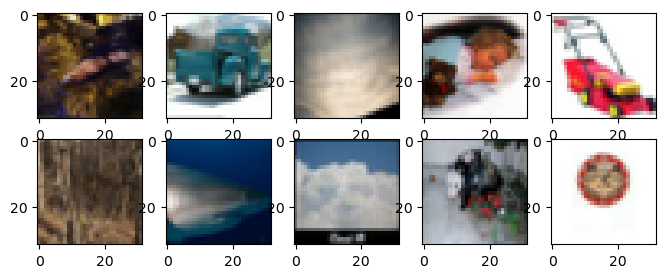

<Figure size 2000x2000 with 0 Axes>

In [14]:
f,ax = plt.subplots(2,5,figsize=(8,3))
f = plt.figure(figsize=(20,20))
for i in range(5):
    for j in range(2):
        ax[j][i].imshow(features[np.random.randint(6000)])
plt.show() 

In [15]:
features.shape

(50000, 32, 32, 3)

**After model training, when predicting we will get output in the form of numerical labels so we will map those with the indexes of the fine and coarse labels from the meta file for proper output.  **

**As all 3 channels are in single row of the array so we need to reshape it to the shape which can be accepted by our neural network**

In [16]:
features = data
print(features.shape)
# reshaping data from from flat to 32*32*3
features = features.reshape((len(data), 3, 32, 32))
features = features.transpose(0, 2, 3, 1)

(50000, 3072)


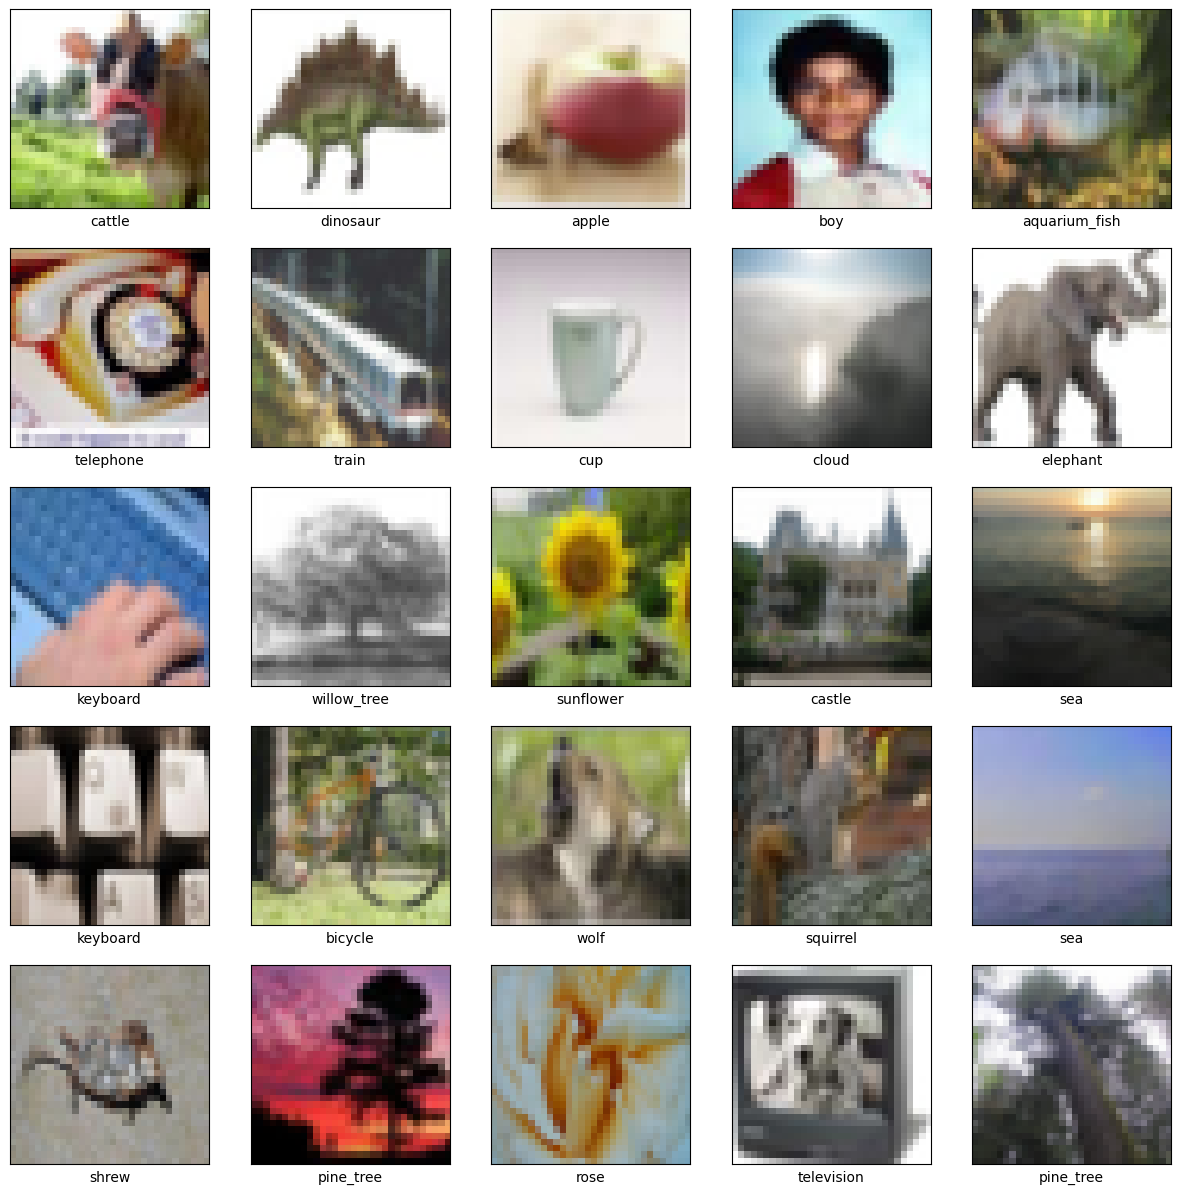

In [17]:
# Show 25 image in the test dataset
plt.figure(figsize=(15,15))
for image in range(0,25):
    i=image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_plot = features[j]
    plt.imshow(data_plot)
    plt.xlabel(str(subcategory[fine_labels[j]]))
plt.show()

**Dataset link:**
https://www.cs.toronto.edu/~kriz/cifar.html

Reshaping it to 32x32 size image with 3 channels as mentioned in the dataset link

# Wrong way to reshape

In [19]:
input_img = data.reshape(50000, 32,32,3)

In [20]:
input_img.shape

(50000, 32, 32, 3)

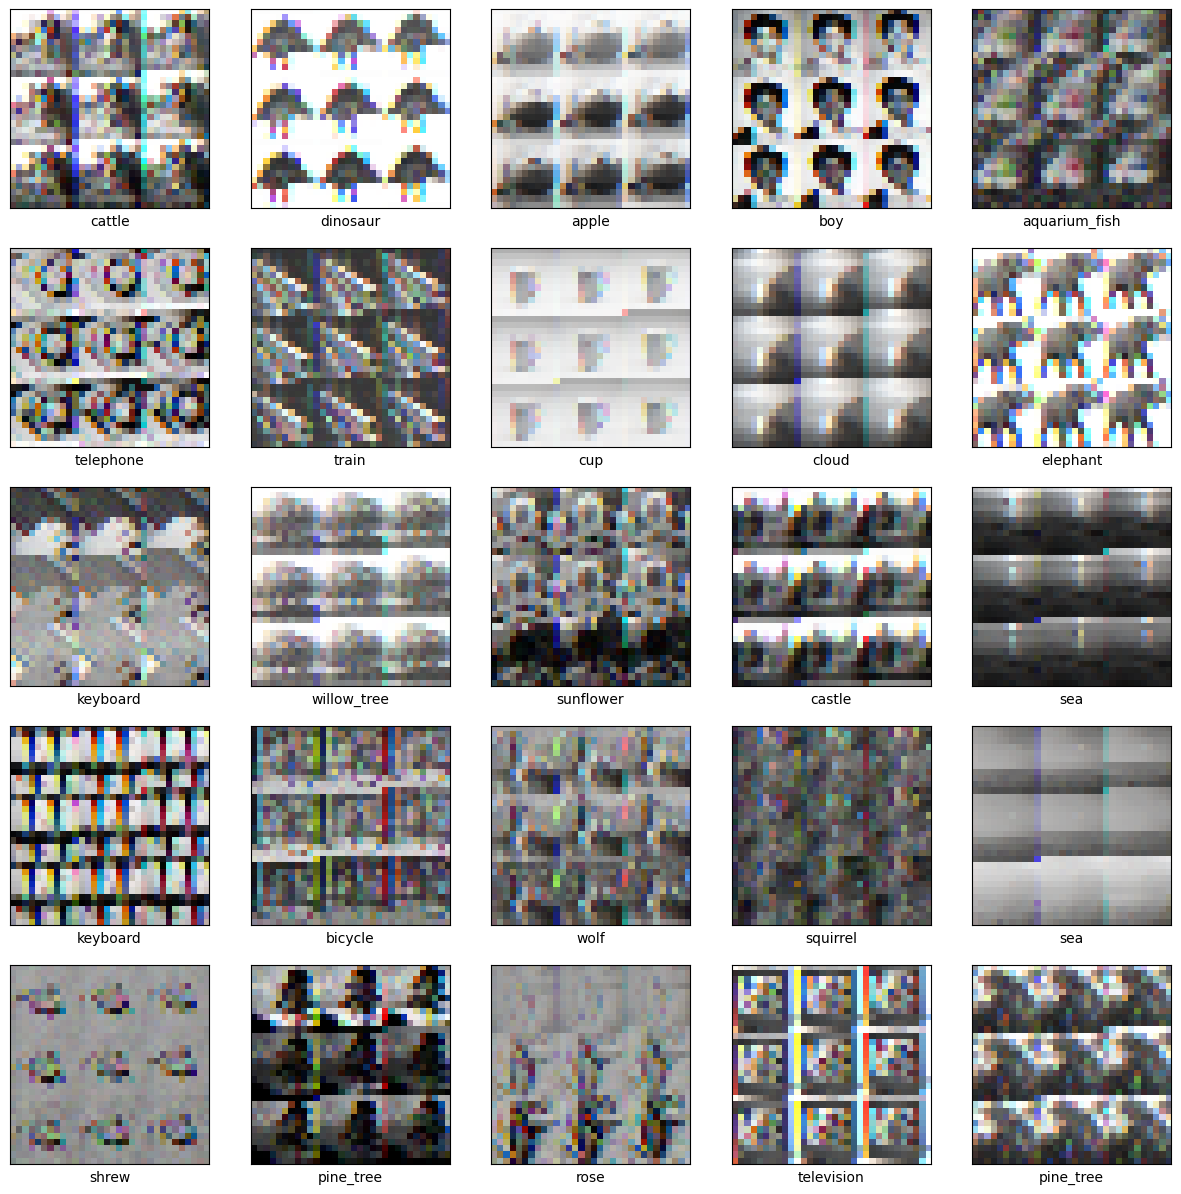

In [21]:
# Show 25 image in the test dataset
plt.figure(figsize=(15,15))
for image in range(0,25):
    i=image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_plot = input_img[j]
    plt.imshow(data_plot)
    plt.xlabel(str(subcategory[fine_labels[j]]))
plt.show()

In [22]:
# Scaling the data
input_img_data = features/255.0

In [23]:
input_img_data[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.76470588, 0.80392157, 0.75686275],
        [0.83137255, 0.87843137, 0.8       ],
        [0.71372549, 0.76078431, 0.65490196]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.69019608, 0.58823529],
        [0.63137255, 0.65882353, 0.50980392],
        [0.57254902, 0.60392157, 0.44313725]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.74117647, 0.78039216, 0.6627451 ],
        [0.65098039, 0.69803922, 0.50980392],
        [0.4745098 , 0.52156863, 0.34117647]],

       ...,

       [[0.58039216, 0.7254902 , 0.30980392],
        [0.55686275, 0.71372549, 0.22352941],
        [0.54901961, 0

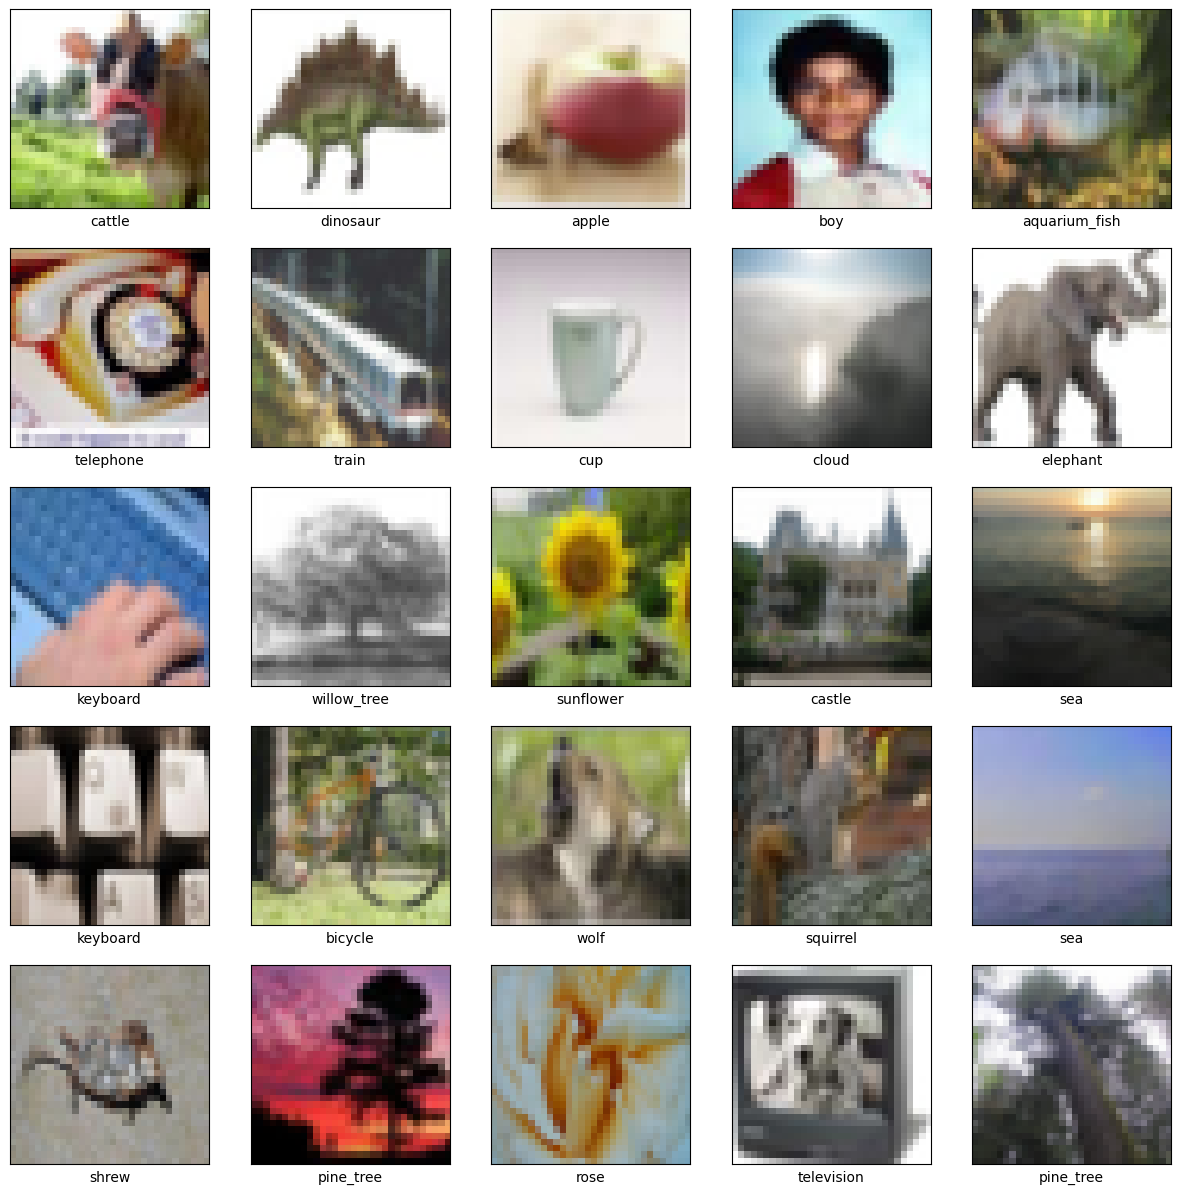

In [24]:
plt.figure(figsize=(15,15))
for image in range(0,25):
    i=image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_plot = input_img_data[j]
    plt.imshow(data_plot)
    plt.xlabel(str(subcategory[fine_labels[j]]))
plt.show()

In [25]:
# Converting these to numpy array
fine_labels_np = np.array(fine_labels) # label for Class of image
coarse_labels_np = np.array(coarse_labels) # label for Super-Class of image



In [26]:
fine_labels_np

array([19, 29,  0, ...,  3,  7, 73])

In [27]:
print(fine_labels_np.shape)
print(coarse_labels_np.shape)

(50000,)
(50000,)


lawn_mower
vehicles_2


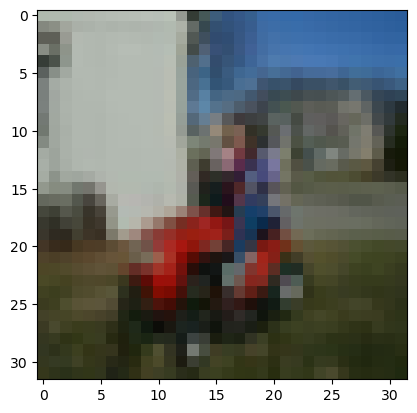

In [28]:
import matplotlib.pyplot as plt
plt.imshow(input_img_data[3100])

print(subcategory[fine_labels_np[3100]])
print(category[coarse_labels_np[3100]])

**Checking if the count of unique labels matches the no. of labels of super class as well as sub class mentioned in the meta file**

**Preparation of test data similar to training data**

In [29]:
test_data = {}
for i in os.listdir():
    if 'test' in i:
        test_data = unpickle(i)
        break



In [30]:
test_data.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [31]:
# Access the data, labels, and other information
data_test = test_data[b'data']
fine_labels_test = test_data[b'fine_labels']
coarse_labels_test = test_data[b'coarse_labels']
batch_label_test = test_data[b'batch_label']
filename_test = test_data[b'filenames']


# Print some information about the loaded batch
print("Number of data points:", len(data_test))
print("Number of fine_labels:", len(fine_labels_test))
print("Number of coarse_labels:", len(coarse_labels_test))
print("Number of batch_label:", len(batch_label_test))
print("Number of filename:", len(filename_test))


Number of data points: 10000
Number of fine_labels: 10000
Number of coarse_labels: 10000
Number of batch_label: 20
Number of filename: 10000


**Reshaping and scaling the test data just like the train data**

In [32]:
features_test = data_test
print(features_test.shape)
# reshaping data from from flat to 32*32*3
features_test = features_test.reshape((len(data_test), 3, 32, 32))
features_test = features_test.transpose(0, 2, 3, 1)


(10000, 3072)


In [33]:
valid_data_test = features_test/255.0

In [34]:
# Converting these to numpy array
fine_labels_np_test = np.array(fine_labels_test) # label for Class of image
coarse_labels_np_test = np.array(coarse_labels_test) # label for Super-Class of image


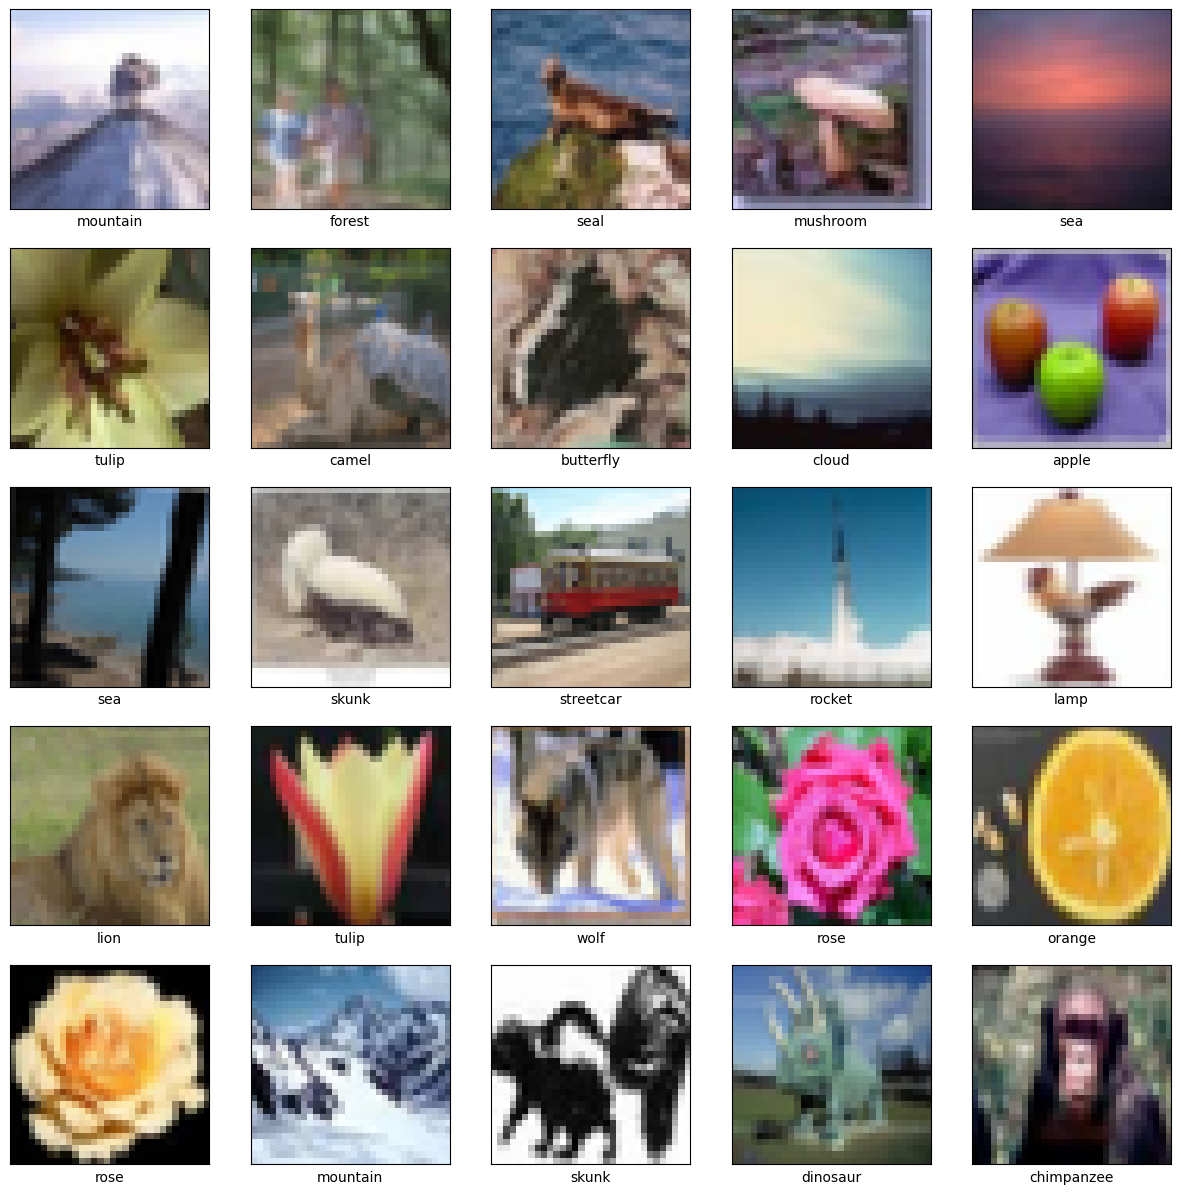

In [35]:
plt.figure(figsize=(15,15))
for image in range(0,25):
    i=image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_plot = features_test[j]
    plt.imshow(data_plot)
    plt.xlabel(str(subcategory[fine_labels_np_test[j]]))
plt.show()

In [36]:
print(fine_labels_np_test.shape)
fine_labels_np_test


(10000,)


array([49, 33, 72, ..., 51, 42, 70])

In [37]:
print(coarse_labels_np_test.shape)
coarse_labels_np_test

(10000,)


array([10, 10,  0, ...,  4,  8,  2])

**Meta data variables:**

class_label

super_class_label

**Train data variables:**

input_img_data    --> I/P

fine_labels_np   --> O/P class

coarse_labels_np --> O/P super-class

**Test data variables:**

data_test            --> I/P

fine_labels_np_test --> O/P class

coarse_labels_np_test --> O/P super-class

**Loading the Resnet pretrained model for convolution**

In [42]:
# import tensorflow as tf
# from keras.applications.resnet50 import  ResNet50
# from keras.layers import *
# from keras.models import Model
# from tensorflow.python.ops.gen_nn_ops import Conv2D
# import matplotlib.pyplot as plt
# from tensorflow import keras
# from keras import layers
# from keras import Sequential

# resnet_conv_base = tf.keras.applications.resnet50.ResNet50(
#     include_top=True,
#     weights='imagenet',
#     input_shape=(224,224,3)
# )


# VGG19

In [38]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras.models import Model
from tensorflow.python.ops.gen_nn_ops import Conv2D
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras import Sequential

VGG19 = keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3)
)

In [39]:
VGG19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [40]:
for layer in VGG19.layers:
    layer.trainable = False

In [41]:
VGG19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [42]:
from keras.applications.vgg19 import preprocess_input, decode_predictions

**Just a trial of neural network. Will be using keras tuner later to improve the accuracy**

In [211]:
# flatten = Flatten()(VGG19.output)

# dense1 = Dense(128, activation='relu')(flatten)
# dense2 = Dense(128, activation='relu')(flatten)

# dense3 = Dense(64, activation='relu')(dense1)
# dense4 = Dense(64, activation='relu')(dense2)

# dense5 = Dense(32, activation='relu')(dense3)
# dense6 = Dense(32, activation='relu')(dense4)

# output1 = Dense(100, activation='softmax', name='Class')(dense5)
# output2 = Dense(20, activation='softmax', name= 'Super-Class')(dense6)

In [212]:
# model = Model(inputs=VGG19.input, outputs=[output1, output2])
# model.summary()

In [ ]:
# !pip install pydot
# !pip install graphviz

In [ ]:
# !pip install tensorflow matplotlib


In [119]:
# from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# early = EarlyStopping( monitor='accuracy',
#                      patience=10,
# 					min_delta=0.001,
# 					restore_best_weights=True)




# chk_point = tf.keras.callbacks.ModelCheckpoint(
#     filepath = 'C:\\Users\\Tanmay\\1_cv_assignments\\cifar-100-python\\Checkpoints',
#     monitor = 'val_loss',
#     verbose= 0,
#     save_best_only  = True,
#     save_weights_only  = False,
#     mode = 'auto',
#     save_freq='epoch',
#     options=None,
#     initial_value_threshold=None
# )

In [43]:
print(coarse_labels_np.shape)
print(fine_labels_np.shape)

(50000,)
(50000,)


In [44]:
num_of_class = len(np.unique(fine_labels_np))
num_of_Superclass = len(np.unique(coarse_labels_np))

In [45]:
print("Unique labels in subcategory:",num_of_class)
print()
print("Unique labels in category:",num_of_Superclass)

Unique labels in subcategory: 100

Unique labels in category: 20


In [46]:
# Shape defined in the architecture and the shape must be same so we need to change it so that final output for the fine label will be 100 classes and for coarse it will be 20
# TRAINING DATA
fine_labels_np = keras.utils.to_categorical(fine_labels_np, num_of_class)
coarse_labels_np = keras.utils.to_categorical(coarse_labels_np, num_of_Superclass)

In [47]:
# Shape defined in the architecture and the shape must be same so we need to change it so that final output for the fine label will be 100 classes and for coarse it will be 20
# VALIDATION DATA
fine_labels_np_test = keras.utils.to_categorical(fine_labels_np_test, num_of_class)
coarse_labels_np_test = keras.utils.to_categorical(coarse_labels_np_test, num_of_Superclass)

In [48]:
print(coarse_labels_np.shape)
print(fine_labels_np.shape)

(50000, 20)
(50000, 100)


In [49]:
print(coarse_labels_np_test.shape)
print(fine_labels_np_test.shape)

(10000, 20)
(10000, 100)


In [50]:
fine_labels_np[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [51]:
fine_labels_np_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [52]:
valid_data_test[0]

array([[[0.78039216, 0.84313725, 0.97647059],
        [0.76862745, 0.82745098, 0.95686275],
        [0.76470588, 0.82352941, 0.95294118],
        ...,
        [0.84705882, 0.90588235, 0.98039216],
        [0.85098039, 0.90588235, 0.98039216],
        [0.87843137, 0.91764706, 0.98823529]],

       [[0.77254902, 0.82352941, 0.9372549 ],
        [0.76470588, 0.81568627, 0.93333333],
        [0.76470588, 0.82352941, 0.94117647],
        ...,
        [0.90588235, 0.95294118, 0.98039216],
        [0.91372549, 0.95294118, 0.98039216],
        [0.94509804, 0.96078431, 0.99215686]],

       [[0.87058824, 0.88627451, 0.96470588],
        [0.83529412, 0.8627451 , 0.94901961],
        [0.81960784, 0.85882353, 0.95294118],
        ...,
        [0.95294118, 0.98039216, 0.98431373],
        [0.95686275, 0.97647059, 0.98431373],
        [0.98039216, 0.98039216, 0.99215686]],

       ...,

       [[0.28235294, 0.28627451, 0.38823529],
        [0.27843137, 0.29019608, 0.4       ],
        [0.29019608, 0

cloud
large_natural_outdoor_scenes


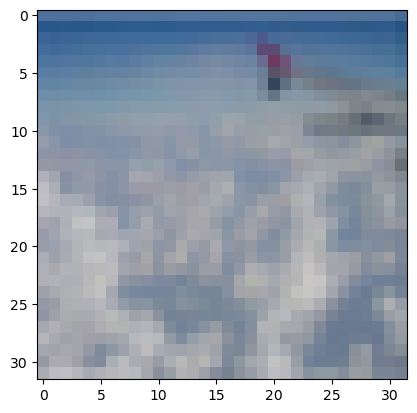

In [56]:
import matplotlib.pyplot as plt
plt.imshow(input_img_data[256])

print(subcategory[fine_labels[256]])
print(category[coarse_labels[256]])

In [ ]:
input_img_data

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Example: Generating a dataset with image arrays and labels
# # Replace this with your actual dataset
# num_samples = 1000
# img_height, img_width, num_channels = 32, 32, 3
# labels = np.random.randint(0, 2, size=num_samples)  # Binary labels (0 or 1)

# # Generating random image arrays (replace this with loading your images)
# images = np.random.random((num_samples, img_height, img_width, num_channels))

# Create an ImageDataGenerator with augmentation configurations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator for the dataset
def generate_augmented_data(images, labels, batch_size=32):
    while True:
        for i in range(0, len(images), batch_size):
            batch_images = images[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]
            
            augmented_images = []
            for img in batch_images:
                augmented_img = datagen.random_transform(img)
                augmented_images.append(augmented_img)
            
            yield np.array(augmented_images), np.array(batch_labels)

# Example usage during model training
batch_size = 32
epochs = 10

# Create a generator for augmented data
augmented_data_generator = generate_augmented_data(input_img_data, fine_labels_np, batch_size=batch_size)

# Use the generator during model training
#model.fit(augmented_data_generator, epochs=epochs, steps_per_epoch=len(images) // batch_size)


TypeError: 'generator' object is not subscriptable

# You can create a tf.data.Dataset that encapsulates your entire training dataset, including both input features and target values.
This approach is often used when dealing with larger datasets that do not fit entirely into memory.

train_dataset = tf.data.Dataset.from_tensor_slices((train_input_data, train_target_data)).batch(batch_size)
model.fit(train_dataset, epochs=num_epochs)

# You can pass your input features and target values directly to the fit method.
This approach is more common when dealing with smaller datasets that can fit into memory

model.fit(train_input_data, train_target_data, epochs=num_epochs, batch_size=batch_size)



In [53]:
train_dataset = tf.data.Dataset.from_tensor_slices((input_img_data, fine_labels_np)).batch(64).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_data_test, fine_labels_np_test)).batch(64).prefetch(tf.data.AUTOTUNE)

In [54]:
import tensorflow as tf



# Iterate through the dataset and print the contents of each batch
for input_batch, label_batch in train_dataset:
    print("Input Batch:")
    print(input_batch)
    print("Label Batch:")
    print(label_batch)
    print("\n")
    break
    


Input Batch:
tf.Tensor(
[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.76470588 0.80392157 0.75686275]
   [0.83137255 0.87843137 0.8       ]
   [0.71372549 0.76078431 0.65490196]]

  [[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.66666667 0.69019608 0.58823529]
   [0.63137255 0.65882353 0.50980392]
   [0.57254902 0.60392157 0.44313725]]

  [[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [1.         1.         1.        ]
   ...
   [0.74117647 0.78039216 0.6627451 ]
   [0.65098039 0.69803922 0.50980392]
   [0.4745098  0.52156863 0.34117647]]

  ...

  [[0.58039216 0.7254902  0.30980392]
   [0.55686275 0.71372549 0.22352941]
   [0.54901961 0.70196078 0.23529412]
   ...
   [0.11764706 0.06666667 0.00392157]
   [0.25490196 0.24313725 0.05882353]
   [0.29803922 0.30196078 0.07843137]]

  [[0.47843137 0.6156

# VGG Training

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers
from keras.layers import *
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from kerastuner.tuners import RandomSearch

# Assuming you have x_train, y_train_output1, y_train_output2 for training data

def build_model(hp):
    x = VGG19.output
    flatten = Flatten()(x)
    counter = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)): # Tune the number of hidden layers
        if counter == 0:
            x = Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=256, step=32),
                              activation=hp.Choice('activation_' + str(i), values=['relu']))(flatten)
            
            x = BatchNormalization()(x)
            #x = Dropout(hp.Choice('Dropout_'+str(i),values=[0.3,0.5]))(x)
            
            counter = counter + 1

        else:
            x = Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=256, step=32),
                              activation=hp.Choice('activation_' + str(i), values=['relu']))(x)
            
            x = BatchNormalization()(x)
            
            if i%2 ==0:
                x = Dropout(hp.Choice('Dropout_'+str(i),values=[0.3,0.5]))(x)
            
            counter = counter + 1
            

    # Output 1
    output1 = Dense(num_of_class, activation='softmax')(x)

    # Output 2
    # output2 = Dense((20), activation='sigmoid', name='Super-Class')(x)

    model = Model(inputs=VGG19.input, outputs=[output1])

    # Compile the model
    # tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))  <---ADAM OPTIMIZER
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss= 'categorical_crossentropy',
                  metrics=['accuracy']
                 )
    
#   

    return model


# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 5 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=10) 

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "C:\\Users\Tanmay\\1_cv_assignments\\cifar-100-python\\Checkpoints"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, #multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=3,
                                                 verbose=1,
                                                 min_lr=1e-7) #reduce the learning rate after X epochs of no improvements

# Define the search space
tuner = RandomSearch(
    build_model,
    objective='accuracy',  # Adjust the objective as needed
    max_trials=4,
    directory='C:\\Users\\Tanmay\\1_cv_assignments\\cifar-100-python',
    project_name='cifar-100_VGG'
)

# Start the search for the best hyperparameters


tuner.search( train_dataset,
             epochs=50,
             validation_data=valid_dataset,
#              validation_split=0.2,
            callbacks = [early_stopping, model_checkpoint, reduce_lr])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.get_best_models(num_models=1)[0]


Trial 1 Complete [00h 45m 32s]
accuracy: 0.2945399880409241

Best accuracy So Far: 0.2945399880409241
Total elapsed time: 00h 45m 32s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
5                 |5                 |num_layers
192               |160               |units_0
relu              |relu              |activation_0
32                |32                |units_1
relu              |relu              |activation_1
32                |32                |units_2
relu              |relu              |activation_2
0.3               |0.3               |Dropout_2
256               |32                |units_3
relu              |relu              |activation_3
160               |32                |units_4
relu              |relu              |activation_4
0.5               |0.3               |Dropout_4

Epoch 1/50
781/782 [============================>.] - ETA: 0s - loss: 4.2073 - accuracy: 0.0805INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assi

INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


782/782 [==============================] - 80s 100ms/step - loss: 4.2072 - accuracy: 0.0805 - val_loss: 3.4313 - val_accuracy: 0.1691 - lr: 0.0010
Epoch 2/50
781/782 [============================>.] - ETA: 0s - loss: 3.6007 - accuracy: 0.1422INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


782/782 [==============================] - 77s 99ms/step - loss: 3.6005 - accuracy: 0.1423 - val_loss: 3.2217 - val_accuracy: 0.2022 - lr: 0.0010
Epoch 3/50
781/782 [============================>.] - ETA: 0s - loss: 3.4026 - accuracy: 0.1755INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


782/782 [==============================] - 77s 99ms/step - loss: 3.4025 - accuracy: 0.1755 - val_loss: 3.1039 - val_accuracy: 0.2219 - lr: 0.0010
Epoch 4/50
781/782 [============================>.] - ETA: 0s - loss: 3.3009 - accuracy: 0.1943INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


782/782 [==============================] - 74s 95ms/step - loss: 3.3008 - accuracy: 0.1943 - val_loss: 3.0584 - val_accuracy: 0.2350 - lr: 0.0010
Epoch 5/50
781/782 [============================>.] - ETA: 0s - loss: 3.2237 - accuracy: 0.2079INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


782/782 [==============================] - 78s 100ms/step - loss: 3.2235 - accuracy: 0.2079 - val_loss: 3.0248 - val_accuracy: 0.2423 - lr: 0.0010
Epoch 6/50
781/782 [============================>.] - ETA: 0s - loss: 3.1728 - accuracy: 0.2186INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


782/782 [==============================] - 80s 102ms/step - loss: 3.1727 - accuracy: 0.2187 - val_loss: 2.9945 - val_accuracy: 0.2538 - lr: 0.0010
Epoch 7/50
 39/782 [>.............................] - ETA: 58s - loss: 3.1674 - accuracy: 0.2264

KeyboardInterrupt: 

In [248]:
train_dataset = tf.data.Dataset.from_tensor_slices((input_img_data, fine_labels_np)).batch(64).prefetch(tf.data.AUTOTUNE)


In [217]:
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_data_test, fine_labels_np_test)).batch(64).prefetch(tf.data.AUTOTUNE)

In [49]:
len(train_dataset)

782

In [50]:
len(valid_dataset)

157

# Random NN

In [93]:
#Create base mode using Sequential API
from tensorflow.keras import regularizers
base_model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0005),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
])

# Define the input shape
inputs = layers.Input(shape=(32, 32, 3), name="input_layer") # shape of input image
x = base_model(inputs)
outputs = layers.Dense(100, activation="softmax", name="output_layer")(x) # same number of outputs as classes
model_1 = tf.keras.Model(inputs, outputs)

#model compile
model_1.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), 
              metrics = ['accuracy'])

In [94]:
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 sequential_3 (Sequential)   (None, 128)               1405600   
                                                                 
 output_layer (Dense)        (None, 100)               12900     
                                                                 
Total params: 1418500 (5.41 MB)
Trainable params: 1416580 (5.40 MB)
Non-trainable params: 1920 (7.50 KB)
_________________________________________________________________


In [95]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5) #if val loss decrease for 5 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "C:\\Users\Tanmay\\1_cv_assignments\\cifar-100-python\\Checkpoints"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

# Creating learning rate reduce callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, #multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=3,
                                                 verbose=1,
                                                 min_lr=1e-7)

In [96]:
data_generator = ImageDataGenerator(
            # randomly rotate images in the range (degrees, 0 to 180)
            rotation_range=15, 
            
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,  
    
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,  
        
            # randomly flip images
            horizontal_flip=True,  
            
            # randomly flip images
            vertical_flip=False,  
    
            # set input mean to 0 over the dataset
            featurewise_center=False,  
    
            # set each sample mean to 0
            samplewise_center=False, 
    
            # divide inputs by std of the dataset
            featurewise_std_normalization=False,  
            
            # divide each input by its std
            samplewise_std_normalization=False, 
    
            # apply ZCA whitening
            zca_whitening=False) 
            
data_generator.fit(input_img_data)

In [97]:
len(input_img_data)

50000

In [98]:
# Fit the model
batch_size=32
#model.fit(augmented_data_generator, epochs=epochs, steps_per_epoch=len(images) // batch_size)
history_1 = model_1.fit(data_generator.flow(input_img_data, fine_labels_np,
                                         batch_size=batch_size),
                        steps_per_epoch=(len(input_img_data) // batch_size),
                        epochs = 100,
                      validation_data=valid_dataset,
                      callbacks=[model_checkpoint, # save only the best model during training
                                 early_stopping, # stop model after X epochs of no improvements
                                 reduce_lr]) # reduce the learning rate after X epochs of no improvements)

Epoch 1/100
1560/1562 [============================>.] - ETA: 0s - loss: 4.7273 - accuracy: 0.0680INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 46s 28ms/step - loss: 4.7265 - accuracy: 0.0681 - val_loss: 4.1653 - val_accuracy: 0.1191 - lr: 0.0010
Epoch 2/100
1561/1562 [============================>.] - ETA: 0s - loss: 4.0798 - accuracy: 0.1308INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 4.0794 - accuracy: 0.1309 - val_loss: 3.7305 - val_accuracy: 0.1890 - lr: 0.0010
Epoch 3/100
1560/1562 [============================>.] - ETA: 0s - loss: 3.8477 - accuracy: 0.1736INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 3.8476 - accuracy: 0.1737 - val_loss: 3.5863 - val_accuracy: 0.2294 - lr: 0.0010
Epoch 4/100
1562/1562 [==============================] - ETA: 0s - loss: 3.6850 - accuracy: 0.2067INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 3.6850 - accuracy: 0.2067 - val_loss: 3.3113 - val_accuracy: 0.2814 - lr: 0.0010
Epoch 5/100
1562/1562 [==============================] - ETA: 0s - loss: 3.5295 - accuracy: 0.2398INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 45s 29ms/step - loss: 3.5295 - accuracy: 0.2398 - val_loss: 3.1538 - val_accuracy: 0.3138 - lr: 0.0010
Epoch 6/100
1562/1562 [==============================] - 42s 27ms/step - loss: 3.4278 - accuracy: 0.2590 - val_loss: 3.1675 - val_accuracy: 0.3111 - lr: 0.0010
Epoch 7/100
1562/1562 [==============================] - ETA: 0s - loss: 3.3627 - accuracy: 0.2748INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 43s 28ms/step - loss: 3.3627 - accuracy: 0.2748 - val_loss: 2.9988 - val_accuracy: 0.3458 - lr: 0.0010
Epoch 8/100
1562/1562 [==============================] - 41s 26ms/step - loss: 3.2905 - accuracy: 0.2885 - val_loss: 3.1033 - val_accuracy: 0.3344 - lr: 0.0010
Epoch 9/100
1561/1562 [============================>.] - ETA: 0s - loss: 3.2231 - accuracy: 0.3048INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 43s 28ms/step - loss: 3.2231 - accuracy: 0.3048 - val_loss: 2.7863 - val_accuracy: 0.3974 - lr: 0.0010
Epoch 10/100
1562/1562 [==============================] - 41s 26ms/step - loss: 3.1790 - accuracy: 0.3139 - val_loss: 2.8534 - val_accuracy: 0.3877 - lr: 0.0010
Epoch 11/100
1561/1562 [============================>.] - ETA: 0s - loss: 3.1300 - accuracy: 0.3262INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 3.1299 - accuracy: 0.3261 - val_loss: 2.7323 - val_accuracy: 0.4086 - lr: 0.0010
Epoch 12/100
1562/1562 [==============================] - 41s 26ms/step - loss: 3.0922 - accuracy: 0.3334 - val_loss: 2.8368 - val_accuracy: 0.3869 - lr: 0.0010
Epoch 13/100
1562/1562 [==============================] - 41s 26ms/step - loss: 3.0590 - accuracy: 0.3417 - val_loss: 2.8165 - val_accuracy: 0.3952 - lr: 0.0010
Epoch 14/100
1561/1562 [============================>.] - ETA: 0s - loss: 3.0109 - accuracy: 0.3486INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 46s 29ms/step - loss: 3.0110 - accuracy: 0.3485 - val_loss: 2.6679 - val_accuracy: 0.4235 - lr: 0.0010
Epoch 15/100
1560/1562 [============================>.] - ETA: 0s - loss: 2.9809 - accuracy: 0.3550INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 46s 30ms/step - loss: 2.9811 - accuracy: 0.3549 - val_loss: 2.6471 - val_accuracy: 0.4306 - lr: 0.0010
Epoch 16/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.9478 - accuracy: 0.3597INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 46s 29ms/step - loss: 2.9477 - accuracy: 0.3597 - val_loss: 2.6320 - val_accuracy: 0.4302 - lr: 0.0010
Epoch 17/100
1562/1562 [==============================] - 41s 26ms/step - loss: 2.9338 - accuracy: 0.3671 - val_loss: 2.7236 - val_accuracy: 0.4267 - lr: 0.0010
Epoch 18/100
1560/1562 [============================>.] - ETA: 0s - loss: 2.9023 - accuracy: 0.3738INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 2.9021 - accuracy: 0.3738 - val_loss: 2.5241 - val_accuracy: 0.4603 - lr: 0.0010
Epoch 19/100
1562/1562 [==============================] - ETA: 0s - loss: 2.8860 - accuracy: 0.3775INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 43s 28ms/step - loss: 2.8860 - accuracy: 0.3775 - val_loss: 2.4885 - val_accuracy: 0.4619 - lr: 0.0010
Epoch 20/100
1562/1562 [==============================] - 41s 26ms/step - loss: 2.8645 - accuracy: 0.3806 - val_loss: 2.5348 - val_accuracy: 0.4540 - lr: 0.0010
Epoch 21/100
1562/1562 [==============================] - 41s 26ms/step - loss: 2.8536 - accuracy: 0.3848 - val_loss: 2.5890 - val_accuracy: 0.4415 - lr: 0.0010
Epoch 22/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.8333 - accuracy: 0.3883
Epoch 22: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1562/1562 [==============================] - 41s 26ms/step - loss: 2.8333 - accuracy: 0.3883 - val_loss: 2.5242 - val_accuracy: 0.4562 - lr: 0.0010
Epoch 23/100
1562/1562 [==============================] - ETA: 0s - loss: 2.6513 - accuracy: 0.4152INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 47s 30ms/step - loss: 2.6513 - accuracy: 0.4152 - val_loss: 2.3205 - val_accuracy: 0.4833 - lr: 2.0000e-04
Epoch 24/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.4959 - accuracy: 0.4329INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 45s 29ms/step - loss: 2.4957 - accuracy: 0.4329 - val_loss: 2.1514 - val_accuracy: 0.5056 - lr: 2.0000e-04
Epoch 25/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.4086 - accuracy: 0.4376INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 43s 28ms/step - loss: 2.4084 - accuracy: 0.4376 - val_loss: 2.1013 - val_accuracy: 0.5061 - lr: 2.0000e-04
Epoch 26/100
1560/1562 [============================>.] - ETA: 0s - loss: 2.3470 - accuracy: 0.4414INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 2.3471 - accuracy: 0.4414 - val_loss: 2.0446 - val_accuracy: 0.5099 - lr: 2.0000e-04
Epoch 27/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.3059 - accuracy: 0.4458INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 2.3058 - accuracy: 0.4458 - val_loss: 2.0081 - val_accuracy: 0.5136 - lr: 2.0000e-04
Epoch 28/100
1562/1562 [==============================] - ETA: 0s - loss: 2.2678 - accuracy: 0.4480INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 45s 29ms/step - loss: 2.2678 - accuracy: 0.4480 - val_loss: 1.9616 - val_accuracy: 0.5175 - lr: 2.0000e-04
Epoch 29/100
1562/1562 [==============================] - 41s 26ms/step - loss: 2.2437 - accuracy: 0.4519 - val_loss: 1.9665 - val_accuracy: 0.5155 - lr: 2.0000e-04
Epoch 30/100
1562/1562 [==============================] - 41s 26ms/step - loss: 2.2174 - accuracy: 0.4559 - val_loss: 1.9646 - val_accuracy: 0.5172 - lr: 2.0000e-04
Epoch 31/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.2067 - accuracy: 0.4546INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 2.2067 - accuracy: 0.4546 - val_loss: 1.9369 - val_accuracy: 0.5178 - lr: 2.0000e-04
Epoch 32/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.2063 - accuracy: 0.4524INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 45s 29ms/step - loss: 2.2063 - accuracy: 0.4524 - val_loss: 1.9086 - val_accuracy: 0.5238 - lr: 2.0000e-04
Epoch 33/100
1560/1562 [============================>.] - ETA: 0s - loss: 2.1841 - accuracy: 0.4624INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 45s 29ms/step - loss: 2.1838 - accuracy: 0.4625 - val_loss: 1.9079 - val_accuracy: 0.5194 - lr: 2.0000e-04
Epoch 34/100
1560/1562 [============================>.] - ETA: 0s - loss: 2.1781 - accuracy: 0.4610INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 43s 28ms/step - loss: 2.1783 - accuracy: 0.4609 - val_loss: 1.8864 - val_accuracy: 0.5248 - lr: 2.0000e-04
Epoch 35/100
1562/1562 [==============================] - 41s 26ms/step - loss: 2.1727 - accuracy: 0.4606 - val_loss: 1.9000 - val_accuracy: 0.5307 - lr: 2.0000e-04
Epoch 36/100
1562/1562 [==============================] - 41s 26ms/step - loss: 2.1689 - accuracy: 0.4616 - val_loss: 1.9114 - val_accuracy: 0.5242 - lr: 2.0000e-04
Epoch 37/100
1562/1562 [==============================] - ETA: 0s - loss: 2.1600 - accuracy: 0.4617
Epoch 37: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1562/1562 [==============================] - 41s 26ms/step - loss: 2.1600 - accuracy: 0.4617 - val_loss: 1.9083 - val_accuracy: 0.5252 - lr: 2.0000e-04
Epoch 38/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.1278 - accuracy: 0.4692INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Chec

INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 2.1274 - accuracy: 0.4693 - val_loss: 1.8658 - val_accuracy: 0.5345 - lr: 4.0000e-05
Epoch 39/100
1562/1562 [==============================] - ETA: 0s - loss: 2.1165 - accuracy: 0.4699INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 2.1165 - accuracy: 0.4699 - val_loss: 1.8524 - val_accuracy: 0.5366 - lr: 4.0000e-05
Epoch 40/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.0942 - accuracy: 0.4764INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 45s 29ms/step - loss: 2.0940 - accuracy: 0.4765 - val_loss: 1.8463 - val_accuracy: 0.5359 - lr: 4.0000e-05
Epoch 41/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.0841 - accuracy: 0.4769INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 46s 29ms/step - loss: 2.0842 - accuracy: 0.4769 - val_loss: 1.8390 - val_accuracy: 0.5353 - lr: 4.0000e-05
Epoch 42/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.0728 - accuracy: 0.4780INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 45s 29ms/step - loss: 2.0727 - accuracy: 0.4780 - val_loss: 1.8298 - val_accuracy: 0.5371 - lr: 4.0000e-05
Epoch 43/100
1562/1562 [==============================] - ETA: 0s - loss: 2.0726 - accuracy: 0.4785INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 45s 29ms/step - loss: 2.0726 - accuracy: 0.4785 - val_loss: 1.8285 - val_accuracy: 0.5368 - lr: 4.0000e-05
Epoch 44/100
1562/1562 [==============================] - ETA: 0s - loss: 2.0515 - accuracy: 0.4823INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 43s 28ms/step - loss: 2.0515 - accuracy: 0.4823 - val_loss: 1.8166 - val_accuracy: 0.5414 - lr: 4.0000e-05
Epoch 45/100
1562/1562 [==============================] - 41s 26ms/step - loss: 2.0512 - accuracy: 0.4809 - val_loss: 1.8305 - val_accuracy: 0.5359 - lr: 4.0000e-05
Epoch 46/100
1560/1562 [============================>.] - ETA: 0s - loss: 2.0461 - accuracy: 0.4832INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 2.0463 - accuracy: 0.4830 - val_loss: 1.8080 - val_accuracy: 0.5393 - lr: 4.0000e-05
Epoch 47/100
1562/1562 [==============================] - ETA: 0s - loss: 2.0418 - accuracy: 0.4788INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 2.0418 - accuracy: 0.4788 - val_loss: 1.8074 - val_accuracy: 0.5371 - lr: 4.0000e-05
Epoch 48/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.0345 - accuracy: 0.4839INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 2.0347 - accuracy: 0.4838 - val_loss: 1.7892 - val_accuracy: 0.5408 - lr: 4.0000e-05
Epoch 49/100
1562/1562 [==============================] - 42s 27ms/step - loss: 2.0366 - accuracy: 0.4810 - val_loss: 1.7995 - val_accuracy: 0.5402 - lr: 4.0000e-05
Epoch 50/100
1562/1562 [==============================] - 41s 26ms/step - loss: 2.0118 - accuracy: 0.4873 - val_loss: 1.7933 - val_accuracy: 0.5397 - lr: 4.0000e-05
Epoch 51/100
1560/1562 [============================>.] - ETA: 0s - loss: 2.0146 - accuracy: 0.4817INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 2.0137 - accuracy: 0.4820 - val_loss: 1.7836 - val_accuracy: 0.5415 - lr: 4.0000e-05
Epoch 52/100
1561/1562 [============================>.] - ETA: 0s - loss: 2.0140 - accuracy: 0.4857INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 47s 30ms/step - loss: 2.0140 - accuracy: 0.4857 - val_loss: 1.7751 - val_accuracy: 0.5439 - lr: 4.0000e-05
Epoch 53/100
1562/1562 [==============================] - ETA: 0s - loss: 2.0085 - accuracy: 0.4866INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 46s 29ms/step - loss: 2.0085 - accuracy: 0.4866 - val_loss: 1.7591 - val_accuracy: 0.5453 - lr: 4.0000e-05
Epoch 54/100
1562/1562 [==============================] - 41s 26ms/step - loss: 1.9969 - accuracy: 0.4843 - val_loss: 1.7711 - val_accuracy: 0.5416 - lr: 4.0000e-05
Epoch 55/100
1562/1562 [==============================] - 42s 27ms/step - loss: 1.9996 - accuracy: 0.4852 - val_loss: 1.7606 - val_accuracy: 0.5440 - lr: 4.0000e-05
Epoch 56/100
1562/1562 [==============================] - ETA: 0s - loss: 2.0007 - accuracy: 0.4853INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 2.0007 - accuracy: 0.4853 - val_loss: 1.7541 - val_accuracy: 0.5464 - lr: 4.0000e-05
Epoch 57/100
1560/1562 [============================>.] - ETA: 0s - loss: 1.9862 - accuracy: 0.4905INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 1.9868 - accuracy: 0.4905 - val_loss: 1.7492 - val_accuracy: 0.5465 - lr: 4.0000e-05
Epoch 58/100
1562/1562 [==============================] - 41s 26ms/step - loss: 1.9751 - accuracy: 0.4906 - val_loss: 1.7554 - val_accuracy: 0.5447 - lr: 4.0000e-05
Epoch 59/100
1562/1562 [==============================] - ETA: 0s - loss: 1.9814 - accuracy: 0.4908INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 45s 29ms/step - loss: 1.9814 - accuracy: 0.4908 - val_loss: 1.7425 - val_accuracy: 0.5453 - lr: 4.0000e-05
Epoch 60/100
1561/1562 [============================>.] - ETA: 0s - loss: 1.9703 - accuracy: 0.4922INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 46s 29ms/step - loss: 1.9702 - accuracy: 0.4923 - val_loss: 1.7418 - val_accuracy: 0.5447 - lr: 4.0000e-05
Epoch 61/100
1562/1562 [==============================] - 41s 26ms/step - loss: 1.9761 - accuracy: 0.4873 - val_loss: 1.7583 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 62/100
1561/1562 [============================>.] - ETA: 0s - loss: 1.9747 - accuracy: 0.4897INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 45s 29ms/step - loss: 1.9748 - accuracy: 0.4896 - val_loss: 1.7319 - val_accuracy: 0.5465 - lr: 4.0000e-05
Epoch 63/100
1562/1562 [==============================] - 41s 27ms/step - loss: 1.9698 - accuracy: 0.4888 - val_loss: 1.7534 - val_accuracy: 0.5410 - lr: 4.0000e-05
Epoch 64/100
1561/1562 [============================>.] - ETA: 0s - loss: 1.9668 - accuracy: 0.4914INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 43s 28ms/step - loss: 1.9667 - accuracy: 0.4914 - val_loss: 1.7267 - val_accuracy: 0.5496 - lr: 4.0000e-05
Epoch 65/100
1560/1562 [============================>.] - ETA: 0s - loss: 1.9610 - accuracy: 0.4943INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\Tanmay\1_cv_assignments\cifar-100-python\Checkpoints\assets


1562/1562 [==============================] - 44s 28ms/step - loss: 1.9612 - accuracy: 0.4942 - val_loss: 1.7132 - val_accuracy: 0.5528 - lr: 4.0000e-05
Epoch 66/100
1562/1562 [==============================] - 41s 26ms/step - loss: 1.9480 - accuracy: 0.4946 - val_loss: 1.7234 - val_accuracy: 0.5500 - lr: 4.0000e-05
Epoch 67/100
1562/1562 [==============================] - 42s 27ms/step - loss: 1.9588 - accuracy: 0.4936 - val_loss: 1.7402 - val_accuracy: 0.5455 - lr: 4.0000e-05
Epoch 68/100
1561/1562 [============================>.] - ETA: 0s - loss: 1.9509 - accuracy: 0.4937
Epoch 68: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
1562/1562 [==============================] - 41s 26ms/step - loss: 1.9511 - accuracy: 0.4936 - val_loss: 1.7161 - val_accuracy: 0.5520 - lr: 4.0000e-05
Epoch 69/100
1562/1562 [==============================] - 41s 27ms/step - loss: 1.9380 - accuracy: 0.4966 - val_loss: 1.7236 - val_accuracy: 0.5491 - lr: 8.0000e-06
Epoch 70/100
1562/1562 [